In [1]:
using NIfTI
using Plots
using Images
using LinearAlgebra
using Statistics
using JLD

# include useful functions
include("utils.jl")

display_imgs

In [2]:
Original = 	 "data/Original Rest/run-8.nii"
SmoothRest = "data/smoothed/saurun-8.nii"
Rest = 		 "data/Rest Unsmoothed/aurun-8.nii"
Structural = "data/Structural/run-3.nii"
Surface_lh = "data/surface/surf/lh.inflated.surf"
Surface_rh = "data/surface/surf/rh.inflated.surf"

"data/surface/surf/rh.inflated.surf"

In [3]:
Original = niread(Original)
println("Original size: ", size(Original))

SmoothRest = niread(SmoothRest)
println("SmoothRest size: ", size(SmoothRest))

Rest = niread(Rest)
println("Rest size: ", size(Rest))

Original size: (128, 128, 39, 120)
SmoothRest size: (128, 128, 39, 120)
Rest size: (128, 128, 39, 120)


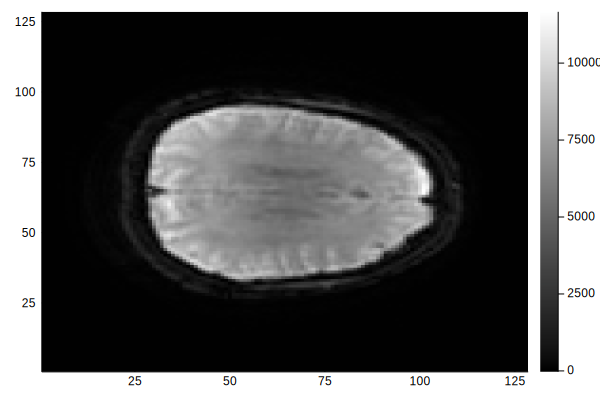

In [4]:
""" Sample plot of non-smoothed image. """
# img = Image()
heatmap(Rest[:, :, 25, 1], c = :greys)
# heatmap(Rest[:, :, 25, 31], c = :greys)
# heatmap(Rest[:, :, 25, 61], c = :greys)

In [5]:
""" Define params to run the algorithm. """
D = 7
H = 0.7
DIMS = 128
SLICE = 5 # Slice we're working on
times = 120   # number of timesteps to load

120

In [6]:
test_imgs = Rest[:, :, SLICE, 1:times]
test_imgs = permutedims(test_imgs, [3,2,1])
println("Dimensions Changed")

Dimensions Changed


In [7]:
NEIGHS = Dict()

# first of all, calculate neighbors efficiently
for i in 1:DIMS
    for j in 1:DIMS
        NEIGHS[string(i)*"-"*string(j)] = neighbors([i,j], DIMS, D)
    end
    if i%30 == 0
        println("row ", i, " done")
    end
end

println("\nNEIGHBORS DONE")

row 30 done
row 60 done
row 90 done
row 120 done

NEIGHBORS DONE


In [8]:
WEIGHTS = Dict()

# key = pointA-pointB :: == example: "12-34"
for i in 1:DIMS
    for j in 1:DIMS
        vecino = NEIGHS[string(i)*"-"*string(j)]
        for v in vecino 
            w = weights(test_imgs, [i,j], v)
            if w == NaN
                WEIGHTS[string(i)*string(j)*"-"*string(v[1])*string(v[2])] = 0
            else
               WEIGHTS[string(i)*string(j)*"-"*string(v[1])*string(v[2])] = w
            end
        end
    end
    if i%16 == 0
        println("row ", i, " done")
    end
end

row 16 done
row 32 done
row 48 done
row 64 done
row 80 done
row 96 done
row 112 done
row 128 done


In [9]:

processed = run(test_imgs, DIMS, H, NEIGHS, WEIGHTS; verbose=1)
println("IMMAGE PROCESSING DONE")

Timestep 1 out of 120 completed
Timestep 2 out of 120 completed
Timestep 3 out of 120 completed
Timestep 4 out of 120 completed
Timestep 5max number of results:


Error thrown in threaded loop on thread 0: InterruptException()

NaN


InterruptException: InterruptException:

In [ ]:
# Save the processed image

save("data.jld", "processed", processed)
# load("data.jld")["processed"]

In [10]:
# %matplotlib notebook

The analogue of IPython's `%matplotlib` in Julia is to use the [PyPlot package](https://github.com/stevengj/PyPlot.jl), which gives a Julia interface to Matplotlib including inline plots in IJulia notebooks.   (The equivalent of `numpy` is already loaded by default in Julia.)

Given PyPlot, the analogue of `%matplotlib inline` is `using PyPlot`, since PyPlot defaults to inline plots in IJulia.

To enable separate GUI windows in PyPlot, analogous to `%matplotlib`, do `using PyPlot; pygui(true)`.   To specify a particular gui backend, analogous to `%matplotlib gui`, you can either do `using PyPlot; pygui(:gui); using PyPlot; pygui(true)` (where `gui` is `wx`, `qt`, `tk`, or `gtk`), or you can do `ENV["MPLBACKEND"]=backend; using PyPlot; pygui(true)` (where `backend` is the name of a Matplotlib backend, like `tkagg`).

For more options, see the PyPlot documentation.


InterruptException: InterruptException: